In [303]:
import ndlib
import networkx as nx
import ndlib.models.epidemics as ep
import json
import ndlib.models.ModelConfig as mc
import numpy as np
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
import tkinter


from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

## Gillespie's direct algorithm ##
From the site of the book


In [419]:
####################################################################
###    This is the PYTHON version of program 6.4 from page 203 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model (including births and deaths) with full    #
### (event-driven) demographic stochasticity.					   #
###																   #
### This is a more complex stochastic model as 6 events are		   #
### possible: infection, recovery, birth, death of susceptible,    #
### death of infected, death of recovered.					       #
### Note: by default we are using a very small population size 	   #
### to highlight the stochasticity.				   				   #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################

import numpy as np
import pylab as pl

beta=1.0
gamma=1/7.0
mu=1/70
N0=500
delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
# Y0=5
# X0=8000
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))

timestep=0.0

def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((7))
	Change=np.zeros((7,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	Rate[6] = delta;  Change[6,:]=([0, +1, 0]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	list1 = np.cumsum(Rate)
	for i in range(len(list1)):
		if list1[i] >= R1*np.sum(Rate):
			V[range(3)] = V[range(3)]+Change[i,:]
			return [V,ts]


def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    S=[0]
    I=[0]
    R=[0]
    while T[lop] < ND:
        lop=lop+1
        T.append(T[lop-1]+ts)
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
        [res,ts] = stoc_eqs(INPUT,ts)
#         lop=lop+1
#         T.append(T[lop-1])
#         S.append(INPUT[0])
#         I.append(INPUT[1])
#         R.append(INPUT[2])
    return [T,S,I,R]

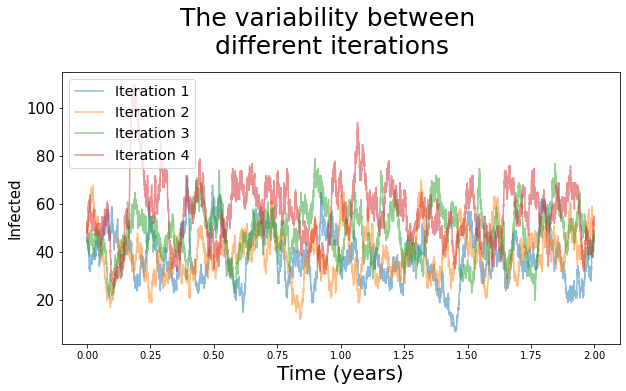

In [420]:
## Variability ##

beta=1.0
gamma=1/7.0
mu=1/70
N0=500
delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))

fig, (ax2) = plt.subplots(1, sharex=True, figsize = (10,5))
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
for i in range(4):
    [T,S,I,R]=Stoch_Iteration(INPUT)

    tT=np.array(T)[1:,]/365.
    tS=np.array(S)[1:,]
    tI=np.array(I)[1:,]
    tR=np.array(R)[1:,]

#     ax1.plot(tT, tS, alpha=0.5, label=('Iteration %s' %(i+1)))
#     ax1.set_ylabel("Susceptible", size = 15)
    ax2.plot(tT, tI, alpha=0.5, label=('Iteration %s' %(i+1)))
    ax2.set_ylabel("Infected", size = 15)
#     ax3.plot(tT, tR, alpha=0.5, label=('Iteration %s' %(i+1)))
#     ax3.set_ylabel("Recovered", size = 15)
    
plt.legend(loc = "upper left", fontsize = "x-large")
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
fig.suptitle('The variability between \n different iterations ', size = 25, y = 1.06)
plt.xlabel ('Time (years)', size = 20)
plt.show()

R0 is:  5.0
0.002187933441780616
0.002187933441780616
0.002187933441780616
0.006918853044878156
0.006918853044878156
0.006918853044878156
0.02187933441780616
0.02187933441780616
0.02187933441780616


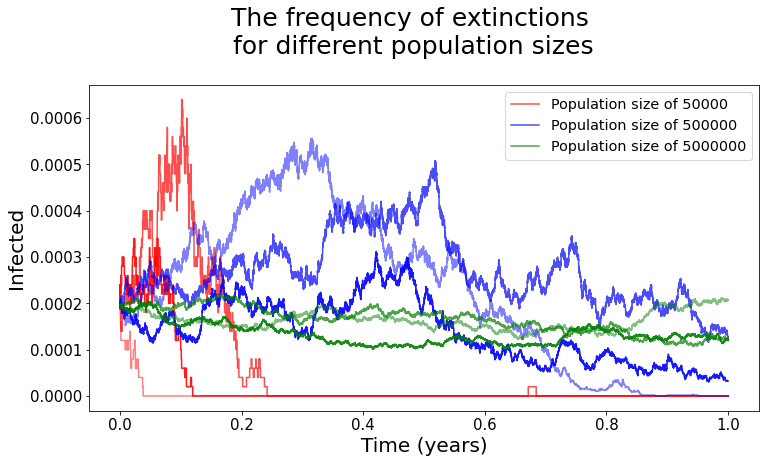

In [344]:
## Extinctions for different population size ##

beta=1
gamma=1/5.0
R0 = beta/gamma
print("R0 is: ", R0)
mu=1/(70*365)
# delta = 0.0005
Nlist = [50000, 500000, 5000000]

fig, (ax2) = plt.subplots(1, sharex=True, figsize = (12, 6))
color = ['red', 'blue', 'green']

for Nvalue in range(3):
    N0 = Nlist[Nvalue]
    alfa = 0.9
    for iteration in range(3):
        Y0=pl.ceil(mu*N0/gamma)
        X0=pl.floor(gamma*N0/beta)
        Z0=N0-X0-Y0
        ND=MaxTime=365.0
        INPUT = np.array((X0,Y0,Z0))
        delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)

#         delta = 0.02
        print(delta)

        [T,S,I,R]=Stoch_Iteration(INPUT)


        tT=np.array(T)[1:,]/365.
        tS=np.array(S)[1:,]
        tI=np.array(I)[1:,]
        tR=np.array(R)[1:,]
        tN = tS + tI + tR

        if iteration == 1:
            ax2.plot(tT, tI/tN, alpha=alfa, color = color[Nvalue], label=('Population size of %s' %(N0)))
        else:
            ax2.plot(tT, tI/tN, alpha=alfa, color = color[Nvalue])
        ax2.set_ylabel("Infected", size = 20)
        alfa = alfa - 0.2
    
plt.legend(loc = "upper right", fontsize = "x-large", bbox_to_anchor = (1,1))
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
fig.suptitle('The frequency of extinctions \n for different population sizes ', size = 25, y = 1.06)
plt.xlabel ('Time (years)', size = 20)
plt.show()

1.25
1.25
1.25
2.5
2.5
2.5
5.0
5.0
5.0


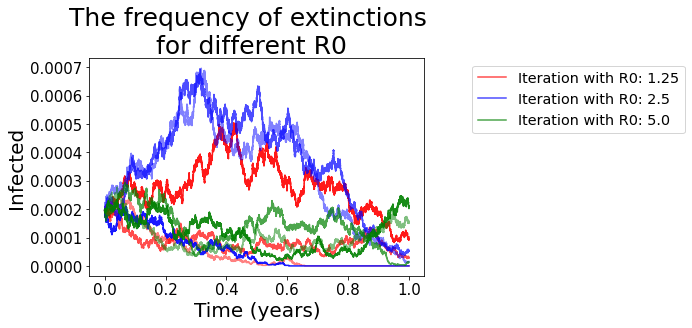

In [348]:
## Extinctions for different R0 ##

betalist = [0.25, 0.5, 1, 2, 4]
gammalist = [1/5, 1/5, 1/5, 1/5, 1/5]
# R0 = beta/gamma
# print("R0 is: ", R0)
mu=1/(70*365)
# delta = 0.0005
N0 = 500000

fig, (ax2) = plt.subplots(1, sharex=True)
color = ['red', 'blue', 'green', 'gray']

for R0value in range(3):
    beta = betalist[R0value]
    gamma = gammalist[R0value]
    alfa = 0.9
    for iteration in range(3):
        Y0=pl.ceil(mu*N0/gamma)
#         Y0 = 1
        X0=pl.floor(gamma*N0/beta)
        Z0=N0-X0-Y0
        ND=MaxTime=365.0
        INPUT = np.array((X0,Y0,Z0))
        delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)

#         delta = 0.0005
        print(beta/gamma)

        [T,S,I,R]=Stoch_Iteration(INPUT)


        tT=np.array(T)[1:,]/365.
        tS=np.array(S)[1:,]
        tI=np.array(I)[1:,]
        tR=np.array(R)[1:,]
        tN = tS + tI + tR

        if iteration == 1:
            ax2.plot(tT, tI/tN, alpha=alfa, color = color[R0value], label=('Iteration with R0: %s' %(beta/gamma)))
        else:
            ax2.plot(tT, tI/tN, alpha=alfa, color = color[R0value])
        ax2.set_ylabel("Infected", size = 20)
        alfa = alfa - 0.2
    
plt.legend(loc = "upper right", fontsize = "x-large", bbox_to_anchor = (1.8,1))
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
fig.suptitle('The frequency of extinctions \n for different R0 ', size = 25, y = 1.06)
plt.xlabel ('Time (years)', size = 20)
plt.show()

## SIR Metapopulation model for humans
From the site of the book

In [345]:
#!/usr/bin/env python

####################################################################
###    This is the PYTHON version of program 7.2 from page 242 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR epidemic in a metapopulationFor simplicity births#
### and deaths have been ignored, and we work with numbers of      #
### individuals.                                                   #
### Y[i][j] refers to infected individual who are currently in i   #
### but live in j..                                                #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################

import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties as fmp

n=5
beta=1*np.ones(n);
gamma=0.3*np.ones(n);
N0=np.zeros(n*n);
X0=np.zeros(n*n);
for i in np.arange(0,n*n,n+1):
	N0[i]=1000.0
	X0[i]=800.0

Y0=np.zeros(n*n); Y0[0]=1.0;
ND=MaxTime=60.
TS=1.0

l=np.zeros((n,n));r=np.zeros((n,n))
for i in range(n):
	for j in range(n):
		if abs(i-j)==1: 
			l[i][j]=0.1
r=2*np.ones((n,n)); r=r-np.diag(np.diag(r));
# print(r)

INPUT0=np.hstack((X0,Y0,N0))
INPUT = np.zeros((3*n*n))
for i in range(n*n):
	INPUT[3*i]=INPUT0[i]
	INPUT[1+3*i]=INPUT0[n*n+i]
	INPUT[2+3*i]=INPUT0[2*n*n+i]

# print(INPUT0)
# print(INPUT)

def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3*n*n))
	V = INP   
	sumY=np.zeros(n)
	sumN=np.zeros(n)
	
	## Calculate number currently in Subpopulation i
	for i in range(n):
		sumY[i]=0.0;sumN[i]=0.0
		for j in range(n):
			k=3*(j+i*n);
			sumN[i]+=V[2+k];
			sumY[i]+=V[1+k];	
			
# 	print(sumY)

	## Set all rates to zeros
	for i in range(n):
		for j in range(n):
			k=3*(j+i*n);
			Y[k]=0; Y[1+k]=0; Y[2+k]=0

	for i in range(n):
		for j in range(n):		
			## Calculate the rates
			k = 3 * (j+i*n) 
			K = 3 * (i+j*n)
			h = 3 * (i+i*n)
			H = 3 * (j+j*n)
			
			Y[k] -= (beta[i]*V[k]*(sumY[i]/sumN[i]))
			Y[k+1] += (beta[i]*V[k]*(sumY[i]/sumN[i]))
			Y[k+1] -= (gamma[i]*V[k+1])
# 			print(Y)          
			
			## Movement
			Y[h] += r[j][i]*V[K]
			Y[h] -= l[j][i]*V[h]
			
			Y[h+1] += r[j][i]*V[K+1]
			Y[h+1] -= l[j][i]*V[h+1]
			
			Y[h+2] += r[j][i]*V[K+2]
			Y[h+2] -= l[j][i]*V[h+2]
			
			Y[k] += l[i][j]*V[H]
			Y[k] -= r[i][j]*V[k]
			
			Y[1+k] += l[i][j]*V[1+H]
			Y[1+k] -= r[i][j]*V[1+k]
			
			Y[2+k] += l[i][j]*V[2+H]
			Y[2+k] -= r[i][j]*V[2+k]
# 	print(Y)
	return Y   # For odeint

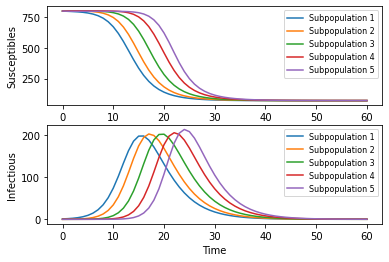

In [346]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
t_course = spi.odeint(diff_eqs,INPUT,t_range)
# print(t_course[1])
tc = t_course

### Plotting
totalS=np.zeros((len(tc),n))
totalI=np.zeros((len(tc),n))

for i in range(n):
	for j in range(n):
		k=3*(j+i*n);
		totalS[:,i]+=tc[:,k]
		totalI[:,i]+=tc[:,k+1]


#print len(totalS)
plt.subplot(211)
for i in range(n):
	plt.plot(t_range,totalS[:,i], label=('Subpopulation %s' %(i+1)))
plt.xlabel('Time')
plt.ylabel('Susceptibles')
plt.legend(loc = "upper right", fontsize = 8)
plt.subplot(212)
for i in range(n):
	plt.plot(t_range,totalI[:,i], label=('Subpopulation %s' %(i+1)))
plt.xlabel('Time')
plt.ylabel('Infectious')
plt.legend(loc = "upper right", fontsize = 8)

plt.show()

## Metapopulation with stochasticity 

In [568]:
def stoc_eqs(INP,ts): 
    for sub in range(nsub): 
        V = INP
        Rate=np.zeros((6))
        Change=np.zeros((6,3))
        N=np.sum(V[sub])
        for subs in range(nsub):          ## sum for lambda i
            sumlambda = 0
            if N == 0:
                sumlambda = 0 
            if sub == subs:
                sumlambda = V[sub][1]/N
            else:
                sumlambda += rho[sub][subs]*V[subs][0]/N
            print(sub)
            print(subs)
            print(rho[sub][subs])
            print(sumlambda)
            
        Rate[0] = sumlambda*V[sub][0]; Change[0,:]=([-1, +1, 0]);
        Rate[1] = gamma*V[sub][1];  Change[1,:]=([0, -1, +1]);
        Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
        Rate[3] = mu*V[sub][0];  Change[3,:]=([-1, 0, 0]);
        Rate[4] = mu*V[sub][1];  Change[4,:]=([0, -1, 0]);
        Rate[5] = mu*V[sub][2];  Change[5,:]=([0, 0, -1]);
        R1=pl.rand();
        list1 = np.cumsum(Rate)
        for i in range(len(list1)):
            if list1[i] >= R1*np.sum(Rate):
                for compartment in range(3):
                    V[sub][compartment] = V[sub][compartment]+Change[i][compartment]
                break
    R2=pl.rand();
    ts = -np.log(R2)/(np.sum(Rate));
    return [V,ts]


def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    S=[[0] for x in range(nsub)]
    I=[[0] for x in range(nsub)]
    R=[[0] for x in range(nsub)]
    while T[lop] < ND:
        lop=lop+1
        T.append(T[lop-1]+ts)
        for sub in range(nsub):
#             print(INPUT[sub][0])
            S[sub].append(INPUT[sub][0])
            I[sub].append(INPUT[sub][1])
            R[sub].append(INPUT[sub][2])
        [INPUT,ts] = stoc_eqs(INPUT,ts)
#         lop=lop+1
#         T.append(T[lop-1])
#         print(T[lop-1])
    return [T,S,I,R]

71.0
0
0
1
0.2
0
1
1
0.142
1
0
1
0.142
1
1
1
0.0
0
0
1
0.198
0
1
1
0.144
1
0
1
0.14171656686626746
1
1
1
0.0
0
0
1
0.196
0
1
1
0.146
1
0
1
0.14342629482071714
1
1
1
0.0
0
0
1
0.19560878243512975
0
1
1
0.14770459081836326
1
0
1
0.1411530815109344
1
1
1
0.0
0
0
1
0.196
0
1
1
0.15
1
0
1
0.14087301587301587
1
1
1
0.0
0
0
1
0.194
0
1
1
0.152
1
0
1
0.1405940594059406
1
1
1
0.0
0
0
1
0.192
0
1
1
0.154
1
0
1
0.14031620553359683
1
1
1
0.0
0
0
1
0.19
0
1
1
0.156
1
0
1
0.14003944773175542
1
1
1
0.0
0
0
1
0.188
0
1
1
0.158
1
0
1
0.13976377952755906
1
1
1
0.0
0
0
1
0.186
0
1
1
0.16
1
0
1
0.13948919449901767
1
1
1
0.0
0
0
1
0.18637274549098196
0
1
1
0.1623246492985972
1
0
1
0.13725490196078433
1
1
1
0.0
0
0
1
0.18837675350701402
0
1
1
0.1623246492985972
1
0
1
0.13555992141453832
1
1
1
0.0
0
0
1
0.1903807615230461
0
1
1
0.1623246492985972
1
0
1
0.1377952755905512
1
1
1
0.0
0
0
1
0.19
0
1
1
0.164
1
0
1
0.137524557956778
1
1
1
0.0
0
0
1
0.188
0
1
1
0.166
1
0
1
0.1392156862745098
1
1
1
0.0
0
0
1
0.18762

1
0.10557768924302789
1
1
1
0.0
0
0
1
0.15991902834008098
0
1
1
0.23481781376518218
1
0
1
0.10578842315369262
1
1
1
0.0
0
0
1
0.15789473684210525
0
1
1
0.23481781376518218
1
0
1
0.106
1
1
1
0.0
0
0
1
0.15587044534412955
0
1
1
0.23279352226720648
1
0
1
0.10821643286573146
1
1
1
0.0
0
0
1
0.15555555555555556
0
1
1
0.23434343434343435
1
0
1
0.11
1
1
1
0.0
0
0
1
0.15524193548387097
0
1
1
0.23588709677419356
1
0
1
0.11177644710578842
1
1
1
0.0
0
0
1
0.15492957746478872
0
1
1
0.23541247484909456
1
0
1
0.11
1
1
1
0.0
0
0
1
0.15524193548387097
0
1
1
0.23588709677419356
1
0
1
0.11222444889779559
1
1
1
0.0
0
0
1
0.15492957746478872
0
1
1
0.23742454728370221
1
0
1
0.11
1
1
1
0.0
0
0
1
0.15694164989939638
0
1
1
0.23943661971830985
1
0
1
0.11177644710578842
1
1
1
0.0
0
0
1
0.1566265060240964
0
1
1
0.23694779116465864
1
0
1
0.11
1
1
1
0.0
0
0
1
0.15863453815261044
0
1
1
0.2389558232931727
1
0
1
0.10978043912175649
1
1
1
0.0
0
0
1
0.158953722334004
0
1
1
0.23943661971830985
1
0
1
0.11
1
1
1
0.0
0
0
1

1
1
0.2908366533864542
1
0
1
0.08757637474541752
1
1
1
0.0
0
0
1
0.16533864541832669
0
1
1
0.2908366533864542
1
0
1
0.08775510204081632
1
1
1
0.0
0
0
1
0.16334661354581673
0
1
1
0.2908366533864542
1
0
1
0.08793456032719836
1
1
1
0.0
0
0
1
0.16135458167330677
0
1
1
0.29282868525896416
1
0
1
0.08775510204081632
1
1
1
0.0
0
0
1
0.16167664670658682
0
1
1
0.2954091816367265
1
0
1
0.08757637474541752
1
1
1
0.0
0
0
1
0.1596806387225549
0
1
1
0.2934131736526946
1
0
1
0.08571428571428572
1
1
1
0.0
0
0
1
0.16167664670658682
0
1
1
0.2954091816367265
1
0
1
0.0855397148676171
1
1
1
0.0
0
0
1
0.162
0
1
1
0.298
1
0
1
0.08333333333333333
1
1
1
0.0
0
0
1
0.164
0
1
1
0.3
1
0
1
0.08316430020283976
1
1
1
0.0
0
0
1
0.162
0
1
1
0.3
1
0
1
0.08333333333333333
1
1
1
0.0
0
0
1
0.16
0
1
1
0.302
1
0
1
0.08519269776876268
1
1
1
0.0
0
0
1
0.1596806387225549
0
1
1
0.3033932135728543
1
0
1
0.08704453441295547
1
1
1
0.0
0
0
1
0.1593625498007968
0
1
1
0.30278884462151395
1
0
1
0.08519269776876268
1
1
1
0.0
0
0
1
0.1613

1
0
1
0.06932773109243698
1
1
1
0.0
0
0
1
0.16135458167330677
0
1
1
0.3426294820717131
1
0
1
0.06736842105263158
1
1
1
0.0
0
0
1
0.16334661354581673
0
1
1
0.34462151394422313
1
0
1
0.06722689075630252
1
1
1
0.0
0
0
1
0.16135458167330677
0
1
1
0.3466135458167331
1
0
1
0.06708595387840671
1
1
1
0.0
0
0
1
0.1596806387225549
0
1
1
0.34930139720558884
1
0
1
0.06485355648535565
1
1
1
0.0
0
0
1
0.16167664670658682
0
1
1
0.3473053892215569
1
0
1
0.06289308176100629
1
1
1
0.0
0
0
1
0.16367265469061876
0
1
1
0.3473053892215569
1
0
1
0.06512605042016807
1
1
1
0.0
0
0
1
0.16334661354581673
0
1
1
0.3466135458167331
1
0
1
0.06526315789473684
1
1
1
0.0
0
0
1
0.16167664670658682
0
1
1
0.34930139720558884
1
0
1
0.06512605042016807
1
1
1
0.0
0
0
1
0.1596806387225549
0
1
1
0.34930139720558884
1
0
1
0.06526315789473684
1
1
1
0.0
0
0
1
0.15768463073852296
0
1
1
0.34930139720558884
1
0
1
0.06751054852320675
1
1
1
0.0
0
0
1
0.15737051792828685
0
1
1
0.350597609561753
1
0
1
0.06947368421052631
1
1
1
0.0
0
0
1

1
0
1
0.028925619834710745
1
1
1
0.0
0
0
1
0.13682092555331993
0
1
1
0.448692152917505
1
0
1
0.030927835051546393
1
1
1
0.0
0
0
1
0.13654618473895583
0
1
1
0.4497991967871486
1
0
1
0.02880658436213992
1
1
1
0.0
0
0
1
0.13682092555331993
0
1
1
0.4507042253521127
1
0
1
0.0288659793814433
1
1
1
0.0
0
0
1
0.13480885311871227
0
1
1
0.45271629778672035
1
0
1
0.02880658436213992
1
1
1
0.0
0
0
1
0.13306451612903225
0
1
1
0.45161290322580644
1
0
1
0.0288659793814433
1
1
1
0.0
0
0
1
0.13333333333333333
0
1
1
0.45252525252525255
1
0
1
0.028925619834710745
1
1
1
0.0
0
0
1
0.13131313131313133
0
1
1
0.45252525252525255
1
0
1
0.028985507246376812
1
1
1
0.0
0
0
1
0.1292929292929293
0
1
1
0.45454545454545453
1
0
1
0.026859504132231406
1
1
1
0.0
0
0
1
0.13131313131313133
0
1
1
0.45656565656565656
1
0
1
0.026804123711340205
1
1
1
0.0
0
0
1
0.1292929292929293
0
1
1
0.45656565656565656
1
0
1
0.024793388429752067
1
1
1
0.0
0
0
1
0.13131313131313133
0
1
1
0.4585858585858586
1
0
1
0.026804123711340205
1
1
1
0

0.47731755424063116
1
0
1
0.029473684210526315
1
1
1
0.0
0
0
1
0.13043478260869565
0
1
1
0.4782608695652174
1
0
1
0.027426160337552744
1
1
1
0.0
0
0
1
0.1324110671936759
0
1
1
0.4762845849802372
1
0
1
0.02959830866807611
1
1
1
0.0
0
0
1
0.13214990138067062
0
1
1
0.47337278106508873
1
0
1
0.02754237288135593
1
1
1
0.0
0
0
1
0.1341222879684418
0
1
1
0.47534516765285995
1
0
1
0.02959830866807611
1
1
1
0.0
0
0
1
0.13385826771653545
0
1
1
0.47244094488188976
1
0
1
0.02754237288135593
1
1
1
0.0
0
0
1
0.13582677165354332
0
1
1
0.4744094488188976
1
0
1
0.02748414376321353
1
1
1
0.0
0
0
1
0.13385826771653545
0
1
1
0.4763779527559055
1
0
1
0.027426160337552744
1
1
1
0.0
0
0
1
0.1341222879684418
0
1
1
0.47928994082840237
1
0
1
0.02736842105263158
1
1
1
0.0
0
0
1
0.13214990138067062
0
1
1
0.4812623274161736
1
0
1
0.025210084033613446
1
1
1
0.0
0
0
1
0.1341222879684418
0
1
1
0.47928994082840237
1
0
1
0.023157894736842106
1
1
1
0.0
0
0
1
0.13609467455621302
0
1
1
0.47731755424063116
1
0
1
0.02109704

0
1
0.0273109243697479
1
1
1
0.0
0
0
1
0.12298387096774194
0
1
1
0.532258064516129
1
0
1
0.02736842105263158
1
1
1
0.0
0
0
1
0.12121212121212122
0
1
1
0.5333333333333333
1
0
1
0.027426160337552744
1
1
1
0.0
0
0
1
0.1214574898785425
0
1
1
0.5364372469635628
1
0
1
0.02736842105263158
1
1
1
0.0
0
0
1
0.1194331983805668
0
1
1
0.5344129554655871
1
0
1
0.027426160337552744
1
1
1
0.0
0
0
1
0.11740890688259109
0
1
1
0.5344129554655871
1
0
1
0.02536997885835095
1
1
1
0.0
0
0
1
0.1194331983805668
0
1
1
0.5364372469635628
1
0
1
0.02531645569620253
1
1
1
0.0
0
0
1
0.11967545638945233
0
1
1
0.537525354969574
1
0
1
0.02536997885835095
1
1
1
0.0
0
0
1
0.11991869918699187
0
1
1
0.5386178861788617
1
0
1
0.02754237288135593
1
1
1
0.0
0
0
1
0.11967545638945233
0
1
1
0.539553752535497
1
0
1
0.02536997885835095
1
1
1
0.0
0
0
1
0.12170385395537525
0
1
1
0.539553752535497
1
0
1
0.023305084745762712
1
1
1
0.0
0
0
1
0.12373225152129817
0
1
1
0.539553752535497
1
0
1
0.02335456475583864
1
1
1
0.0
0
0
1
0.1239837

0.03549060542797495
1
1
1
0.0
0
0
1
0.0967741935483871
0
1
1
0.594758064516129
1
0
1
0.03333333333333333
1
1
1
0.0
0
0
1
0.09879032258064516
0
1
1
0.594758064516129
1
0
1
0.03549060542797495
1
1
1
0.0
0
0
1
0.09859154929577464
0
1
1
0.5955734406438632
1
0
1
0.035416666666666666
1
1
1
0.0
0
0
1
0.096579476861167
0
1
1
0.5955734406438632
1
0
1
0.03549060542797495
1
1
1
0.0
0
0
1
0.0967741935483871
0
1
1
0.594758064516129
1
0
1
0.03765690376569038
1
1
1
0.0
0
0
1
0.096579476861167
0
1
1
0.5935613682092555
1
0
1
0.039832285115303984
1
1
1
0.0
0
0
1
0.0963855421686747
0
1
1
0.5943775100401606
1
0
1
0.04184100418410042
1
1
1
0.0
0
0
1
0.09619238476953908
0
1
1
0.5951903807615231
1
0
1
0.04175365344467641
1
1
1
0.0
0
0
1
0.09418837675350701
0
1
1
0.5971943887775552
1
0
1
0.041666666666666664
1
1
1
0.0
0
0
1
0.09218436873747494
0
1
1
0.5971943887775552
1
0
1
0.04175365344467641
1
1
1
0.0
0
0
1
0.09036144578313253
0
1
1
0.5963855421686747
1
0
1
0.04184100418410042
1
1
1
0.0
0
0
1
0.088353413654

1
1
0.6071428571428571
1
0
1
0.038135593220338986
1
1
1
0.0
0
0
1
0.09325396825396826
0
1
1
0.6091269841269841
1
0
1
0.040169133192389
1
1
1
0.0
0
0
1
0.09306930693069307
0
1
1
0.6099009900990099
1
0
1
0.0379746835443038
1
1
1
0.0
0
0
1
0.09504950495049505
0
1
1
0.6099009900990099
1
0
1
0.03805496828752643
1
1
1
0.0
0
0
1
0.09306930693069307
0
1
1
0.6079207920792079
1
0
1
0.038135593220338986
1
1
1
0.0
0
0
1
0.09108910891089109
0
1
1
0.6099009900990099
1
0
1
0.040169133192389
1
1
1
0.0
0
0
1
0.09090909090909091
0
1
1
0.6067193675889329
1
0
1
0.04025423728813559
1
1
1
0.0
0
0
1
0.09108910891089109
0
1
1
0.6059405940594059
1
0
1
0.040339702760084924
1
1
1
0.0
0
0
1
0.0891089108910891
0
1
1
0.6079207920792079
1
0
1
0.038135593220338986
1
1
1
0.0
0
0
1
0.09108910891089109
0
1
1
0.6099009900990099
1
0
1
0.03805496828752643
1
1
1
0.0
0
0
1
0.0891089108910891
0
1
1
0.6118811881188119
1
0
1
0.04008438818565401
1
1
1
0.0
0
0
1
0.08893280632411067
0
1
1
0.6126482213438735
1
0
1
0.04
1
1
1
0.0
0


1
0.0
0
0
1
0.10536779324055666
0
1
1
0.6699801192842942
1
0
1
0.024793388429752067
1
1
1
0.0
0
0
1
0.10515873015873016
0
1
1
0.6706349206349206
1
0
1
0.026804123711340205
1
1
1
0.0
0
0
1
0.10495049504950495
0
1
1
0.6712871287128713
1
0
1
0.024691358024691357
1
1
1
0.0
0
0
1
0.10693069306930693
0
1
1
0.6732673267326733
1
0
1
0.024640657084188913
1
1
1
0.0
0
0
1
0.10714285714285714
0
1
1
0.6765873015873016
1
0
1
0.02459016393442623
1
1
1
0.0
0
0
1
0.1073558648111332
0
1
1
0.679920477137177
1
0
1
0.024539877300613498
1
1
1
0.0
0
0
1
0.10536779324055666
0
1
1
0.6819085487077535
1
0
1
0.024489795918367346
1
1
1
0.0
0
0
1
0.10337972166998012
0
1
1
0.68389662027833
1
0
1
0.024439918533604887
1
1
1
0.0
0
0
1
0.10139165009940358
0
1
1
0.6858846918489065
1
0
1
0.026422764227642278
1
1
1
0.0
0
0
1
0.10119047619047619
0
1
1
0.6825396825396826
1
0
1
0.026476578411405296
1
1
1
0.0
0
0
1
0.0992063492063492
0
1
1
0.6845238095238095
1
0
1
0.024390243902439025
1
1
1
0.0
0
0
1
0.09940357852882704
0
1
1


1
1
1
0.0
0
0
1
0.09292929292929293
0
1
1
0.7494949494949495
1
0
1
0.018072289156626505
1
1
1
0.0
0
0
1
0.09494949494949495
0
1
1
0.7474747474747475
1
0
1
0.018108651911468814
1
1
1
0.0
0
0
1
0.09292929292929293
0
1
1
0.7474747474747475
1
0
1
0.018145161290322582
1
1
1
0.0
0
0
1
0.0931174089068826
0
1
1
0.7469635627530364
1
0
1
0.01818181818181818
1
1
1
0.0
0
0
1
0.09127789046653144
0
1
1
0.7464503042596349
1
0
1
0.018218623481781375
1
1
1
0.0
0
0
1
0.09146341463414634
0
1
1
0.75
1
0
1
0.01616161616161616
1
1
1
0.0
0
0
1
0.09164969450101833
0
1
1
0.7535641547861507
1
0
1
0.018145161290322582
1
1
1
0.0
0
0
1
0.09146341463414634
0
1
1
0.7540650406504065
1
0
1
0.02012072434607646
1
1
1
0.0
0
0
1
0.09127789046653144
0
1
1
0.7545638945233266
1
0
1
0.018072289156626505
1
1
1
0.0
0
0
1
0.09330628803245436
0
1
1
0.7565922920892495
1
0
1
0.02004008016032064
1
1
1
0.0
0
0
1
0.0931174089068826
0
1
1
0.7530364372469636
1
0
1
0.02208835341365462
1
1
1
0.0
0
0
1
0.09292929292929293
0
1
1
0.749494949

1
1
0.7824267782426778
1
0
1
0.008146639511201629
1
1
1
0.0
0
0
1
0.09853249475890985
0
1
1
0.7861635220125787
1
0
1
0.008130081300813009
1
1
1
0.0
0
0
1
0.09873949579831932
0
1
1
0.7857142857142857
1
0
1
0.010183299389002037
1
1
1
0.0
0
0
1
0.09853249475890985
0
1
1
0.7840670859538784
1
0
1
0.01020408163265306
1
1
1
0.0
0
0
1
0.09873949579831932
0
1
1
0.7878151260504201
1
0
1
0.010183299389002037
1
1
1
0.0
0
0
1
0.0968421052631579
0
1
1
0.7894736842105263
1
0
1
0.012244897959183673
1
1
1
0.0
0
0
1
0.09663865546218488
0
1
1
0.7899159663865546
1
0
1
0.010183299389002037
1
1
1
0.0
0
0
1
0.09873949579831932
0
1
1
0.792016806722689
1
0
1
0.012195121951219513
1
1
1
0.0
0
0
1
0.09853249475890985
0
1
1
0.7882599580712788
1
0
1
0.012219959266802444
1
1
1
0.0
0
0
1
0.09873949579831932
0
1
1
0.792016806722689
1
0
1
0.01016260162601626
1
1
1
0.0
0
0
1
0.10084033613445378
0
1
1
0.7899159663865546
1
0
1
0.010183299389002037
1
1
1
0.0
0
0
1
0.10105263157894737
0
1
1
0.7936842105263158
1
0
1
0.010162

0
0
1
0.08368200836820083
0
1
1
0.8242677824267782
1
0
1
0.02
1
1
1
0.0
0
0
1
0.08158995815899582
0
1
1
0.8263598326359832
1
0
1
0.01996007984031936
1
1
1
0.0
0
0
1
0.0794979079497908
0
1
1
0.8242677824267782
1
0
1
0.02
1
1
1
0.0
0
0
1
0.07740585774058577
0
1
1
0.8242677824267782
1
0
1
0.02004008016032064
1
1
1
0.0
0
0
1
0.07531380753138076
0
1
1
0.8221757322175732
1
0
1
0.02208835341365462
1
1
1
0.0
0
0
1
0.07515657620041753
0
1
1
0.8225469728601252
1
0
1
0.02004008016032064
1
1
1
0.0
0
0
1
0.07724425887265135
0
1
1
0.8204592901878914
1
0
1
0.020080321285140562
1
1
1
0.0
0
0
1
0.07740585774058577
0
1
1
0.8242677824267782
1
0
1
0.02004008016032064
1
1
1
0.0
0
0
1
0.07756813417190776
0
1
1
0.8280922431865828
1
0
1
0.022
1
1
1
0.0
0
0
1
0.07740585774058577
0
1
1
0.8284518828451883
1
0
1
0.01996007984031936
1
1
1
0.0
0
0
1
0.0794979079497908
0
1
1
0.8305439330543933
1
0
1
0.021912350597609563
1
1
1
0.0
0
0
1
0.07933194154488518
0
1
1
0.826722338204593
1
0
1
0.023952095808383235
1
1
1
0.0


0.09808102345415778
0
1
1
0.8784648187633263
1
0
1
0.0019569471624266144
1
1
1
0.0
0
0
1
0.09594882729211088
0
1
1
0.8763326226012793
1
0
1
0.0
1
1
1
0.0
0
0
1
0.09808102345415778
0
1
1
0.8742004264392325
1
0
1
0.0
1
1
1
0.0
0
0
1
0.09594882729211088
0
1
1
0.8742004264392325
1
0
1
0.0
1
1
1
0.0
0
0
1
0.09615384615384616
0
1
1
0.8739316239316239
1
0
1
0.0019723865877712033
1
1
1
0.0
0
0
1
0.09594882729211088
0
1
1
0.8742004264392325
1
0
1
0.001968503937007874
1
1
1
0.0
0
0
1
0.09381663113006397
0
1
1
0.8742004264392325
1
0
1
0.0039447731755424065
1
1
1
0.0
0
0
1
0.09361702127659574
0
1
1
0.874468085106383
1
0
1
0.003937007874015748
1
1
1
0.0
0
0
1
0.09148936170212765
0
1
1
0.8765957446808511
1
0
1
0.005893909626719057
1
1
1
0.0
0
0
1
0.09129511677282377
0
1
1
0.8726114649681529
1
0
1
0.007874015748031496
1
1
1
0.0
0
0
1
0.09110169491525423
0
1
1
0.8728813559322034
1
0
1
0.009823182711198428
1
1
1
0.0
0
0
1
0.09090909090909091
0
1
1
0.8731501057082452
1
0
1
0.00784313725490196
1
1
1
0.0


1
1
1
0.0
0
0
1
0.0970464135021097
0
1
1
0.9156118143459916
1
0
1
0.009560229445506692
1
1
1
0.0
0
0
1
0.0968421052631579
0
1
1
0.911578947368421
1
0
1
0.009578544061302681
1
1
1
0.0
0
0
1
0.09473684210526316
0
1
1
0.9094736842105263
1
0
1
0.011516314779270634
1
1
1
0.0
0
0
1
0.09453781512605042
0
1
1
0.9054621848739496
1
0
1
0.013461538461538462
1
1
1
0.0
0
0
1
0.09433962264150944
0
1
1
0.9014675052410901
1
0
1
0.015414258188824663
1
1
1
0.0
0
0
1
0.09414225941422594
0
1
1
0.9016736401673641
1
0
1
0.013461538461538462
1
1
1
0.0
0
0
1
0.09623430962343096
0
1
1
0.899581589958159
1
0
1
0.015414258188824663
1
1
1
0.0
0
0
1
0.09603340292275574
0
1
1
0.8997912317327766
1
0
1
0.01730769230769231
1
1
1
0.0
0
0
1
0.09583333333333334
0
1
1
0.9
1
0
1
0.019193857965451054
1
1
1
0.0
0
0
1
0.09563409563409564
0
1
1
0.9002079002079002
1
0
1
0.0210727969348659
1
1
1
0.0
0
0
1
0.0954356846473029
0
1
1
0.8983402489626556
1
0
1
0.019193857965451054
1
1
1
0.0
0
0
1
0.0975103734439834
0
1
1
0.900414937759

0
1
0.10084033613445378
0
1
1
0.9285714285714286
1
0
1
0.011494252873563218
1
1
1
0.0
0
0
1
0.10294117647058823
0
1
1
0.930672268907563
1
0
1
0.011472275334608031
1
1
1
0.0
0
0
1
0.10084033613445378
0
1
1
0.9327731092436975
1
0
1
0.013358778625954198
1
1
1
0.0
0
0
1
0.10062893081761007
0
1
1
0.9287211740041929
1
0
1
0.01338432122370937
1
1
1
0.0
0
0
1
0.09853249475890985
0
1
1
0.9266247379454927
1
0
1
0.013409961685823755
1
1
1
0.0
0
0
1
0.09643605870020965
0
1
1
0.9245283018867925
1
0
1
0.013435700575815739
1
1
1
0.0
0
0
1
0.09453781512605042
0
1
1
0.9285714285714286
1
0
1
0.013409961685823755
1
1
1
0.0
0
0
1
0.09473684210526316
0
1
1
0.9284210526315789
1
0
1
0.015355086372360844
1
1
1
0.0
0
0
1
0.09453781512605042
0
1
1
0.9243697478991597
1
0
1
0.015384615384615385
1
1
1
0.0
0
0
1
0.09473684210526316
0
1
1
0.9284210526315789
1
0
1
0.015355086372360844
1
1
1
0.0
0
0
1
0.09282700421940929
0
1
1
0.9282700421940928
1
0
1
0.015384615384615385
1
1
1
0.0
0
0
1
0.09090909090909091
0
1
1
0.93

1
1
0.0
0
0
1
0.0899581589958159
0
1
1
0.893305439330544
1
0
1
0.018072289156626505
1
1
1
0.0
0
0
1
0.08786610878661087
0
1
1
0.893305439330544
1
0
1
0.018108651911468814
1
1
1
0.0
0
0
1
0.0880503144654088
0
1
1
0.8930817610062893
1
0
1
0.016129032258064516
1
1
1
0.0
0
0
1
0.09014675052410902
0
1
1
0.8909853249475891
1
0
1
0.01818181818181818
1
1
1
0.0
0
0
1
0.0899581589958159
0
1
1
0.891213389121339
1
0
1
0.018145161290322582
1
1
1
0.0
0
0
1
0.08786610878661087
0
1
1
0.891213389121339
1
0
1
0.01818181818181818
1
1
1
0.0
0
0
1
0.0880503144654088
0
1
1
0.8951781970649895
1
0
1
0.016129032258064516
1
1
1
0.0
0
0
1
0.09014675052410902
0
1
1
0.8930817610062893
1
0
1
0.01616161616161616
1
1
1
0.0
0
0
1
0.08823529411764706
0
1
1
0.8970588235294118
1
0
1
0.014112903225806451
1
1
1
0.0
0
0
1
0.09033613445378151
0
1
1
0.8991596638655462
1
0
1
0.014084507042253521
1
1
1
0.0
0
0
1
0.09052631578947369
0
1
1
0.9031578947368422
1
0
1
0.01606425702811245
1
1
1
0.0
0
0
1
0.09033613445378151
0
1
1
0.90

1
0.0
0
0
1
0.100418410041841
0
1
1
0.9184100418410042
1
0
1
0.014
1
1
1
0.0
0
0
1
0.10020876826722339
0
1
1
0.918580375782881
1
0
1
0.013972055888223553
1
1
1
0.0
0
0
1
0.09812108559498957
0
1
1
0.9164926931106472
1
0
1
0.012
1
1
1
0.0
0
0
1
0.10020876826722339
0
1
1
0.918580375782881
1
0
1
0.011976047904191617
1
1
1
0.0
0
0
1
0.09812108559498957
0
1
1
0.9206680584551148
1
0
1
0.0099601593625498
1
1
1
0.0
0
0
1
0.10020876826722339
0
1
1
0.9206680584551148
1
0
1
0.00998003992015968
1
1
1
0.0
0
0
1
0.100418410041841
0
1
1
0.9246861924686193
1
0
1
0.0099601593625498
1
1
1
0.0
0
0
1
0.09832635983263599
0
1
1
0.9267782426778243
1
0
1
0.009940357852882704
1
1
1
0.0
0
0
1
0.09853249475890985
0
1
1
0.9266247379454927
1
0
1
0.0099601593625498
1
1
1
0.0
0
0
1
0.09643605870020965
0
1
1
0.9245283018867925
1
0
1
0.00998003992015968
1
1
1
0.0
0
0
1
0.09663865546218488
0
1
1
0.9285714285714286
1
0
1
0.0099601593625498
1
1
1
0.0
0
0
1
0.09453781512605042
0
1
1
0.930672268907563
1
0
1
0.00994035785288

0.0
0
0
1
0.07468879668049792
0
1
1
0.9585062240663901
1
0
1
0.011627906976744186
1
1
1
0.0
0
0
1
0.07484407484407485
0
1
1
0.9625779625779626
1
0
1
0.01160541586073501
1
1
1
0.0
0
0
1
0.07276507276507277
0
1
1
0.9625779625779626
1
0
1
0.009689922480620155
1
1
1
0.0
0
0
1
0.07484407484407485
0
1
1
0.9604989604989606
1
0
1
0.009708737864077669
1
1
1
0.0
0
0
1
0.07276507276507277
0
1
1
0.9584199584199584
1
0
1
0.009727626459143969
1
1
1
0.0
0
0
1
0.07068607068607069
0
1
1
0.9604989604989606
1
0
1
0.009708737864077669
1
1
1
0.0
0
0
1
0.06860706860706861
0
1
1
0.9625779625779626
1
0
1
0.009689922480620155
1
1
1
0.0
0
0
1
0.06652806652806653
0
1
1
0.9625779625779626
1
0
1
0.009708737864077669
1
1
1
0.0
0
0
1
0.06444906444906445
0
1
1
0.9646569646569647
1
0
1
0.009689922480620155
1
1
1
0.0
0
0
1
0.06458333333333334
0
1
1
0.9645833333333333
1
0
1
0.011650485436893204
1
1
1
0.0
0
0
1
0.06444906444906445
0
1
1
0.9604989604989606
1
0
1
0.011673151750972763
1
1
1
0.0
0
0
1
0.062370062370062374
0


1
0.9552845528455285
1
0
1
0.021359223300970873
1
1
1
0.0
0
0
1
0.07520325203252033
0
1
1
0.9532520325203252
1
0
1
0.019455252918287938
1
1
1
0.0
0
0
1
0.07723577235772358
0
1
1
0.9532520325203252
1
0
1
0.021442495126705652
1
1
1
0.0
0
0
1
0.07707910750507099
0
1
1
0.9533468559837728
1
0
1
0.023346303501945526
1
1
1
0.0
0
0
1
0.07692307692307693
0
1
1
0.9493927125506073
1
0
1
0.021442495126705652
1
1
1
0.0
0
0
1
0.07894736842105263
0
1
1
0.9473684210526315
1
0
1
0.01953125
1
1
1
0.0
0
0
1
0.08097165991902834
0
1
1
0.9453441295546559
1
0
1
0.01761252446183953
1
1
1
0.0
0
0
1
0.08299595141700405
0
1
1
0.9473684210526315
1
0
1
0.01953125
1
1
1
0.0
0
0
1
0.08282828282828283
0
1
1
0.9474747474747475
1
0
1
0.017543859649122806
1
1
1
0.0
0
0
1
0.08484848484848485
0
1
1
0.9454545454545454
1
0
1
0.017578125
1
1
1
0.0
0
0
1
0.08502024291497975
0
1
1
0.9493927125506073
1
0
1
0.01949317738791423
1
1
1
0.0
0
0
1
0.08484848484848485
0
1
1
0.9494949494949495
1
0
1
0.019455252918287938
1
1
1
0.0
0
0
1

1
0
1
0.019646365422396856
1
1
1
0.0
0
0
1
0.08979591836734693
0
1
1
0.9612244897959183
1
0
1
0.01968503937007874
1
1
1
0.0
0
0
1
0.08775510204081632
0
1
1
0.963265306122449
1
0
1
0.021611001964636542
1
1
1
0.0
0
0
1
0.08757637474541752
0
1
1
0.9592668024439919
1
0
1
0.021653543307086614
1
1
1
0.0
0
0
1
0.08775510204081632
0
1
1
0.9591836734693877
1
0
1
0.01972386587771203
1
1
1
0.0
0
0
1
0.08979591836734693
0
1
1
0.9571428571428572
1
0
1
0.019762845849802372
1
1
1
0.0
0
0
1
0.08775510204081632
0
1
1
0.9591836734693877
1
0
1
0.01775147928994083
1
1
1
0.0
0
0
1
0.08979591836734693
0
1
1
0.9612244897959183
1
0
1
0.017716535433070866
1
1
1
0.0
0
0
1
0.08997955010224949
0
1
1
0.9652351738241309
1
0
1
0.01768172888015717
1
1
1
0.0
0
0
1
0.09016393442622951
0
1
1
0.9651639344262295
1
0
1
0.01968503937007874
1
1
1
0.0
0
0
1
0.08997955010224949
0
1
1
0.9652351738241309
1
0
1
0.01768172888015717
1
1
1
0.0
0
0
1
0.09202453987730061
0
1
1
0.967280163599182
1
0
1
0.01764705882352941
1
1
1
0.0
0
0


1
0.017964071856287425
1
1
1
0.0
0
0
1
0.08401639344262295
0
1
1
0.9549180327868853
1
0
1
0.018
1
1
1
0.0
0
0
1
0.08196721311475409
0
1
1
0.9528688524590164
1
0
1
0.02004008016032064
1
1
1
0.0
0
0
1
0.081799591002045
0
1
1
0.9488752556237219
1
0
1
0.020080321285140562
1
1
1
0.0
0
0
1
0.07975460122699386
0
1
1
0.9468302658486708
1
0
1
0.02012072434607646
1
1
1
0.0
0
0
1
0.07770961145194274
0
1
1
0.9488752556237219
1
0
1
0.020080321285140562
1
1
1
0.0
0
0
1
0.0778688524590164
0
1
1
0.9487704918032787
1
0
1
0.018108651911468814
1
1
1
0.0
0
0
1
0.07991803278688525
0
1
1
0.9508196721311475
1
0
1
0.018072289156626505
1
1
1
0.0
0
0
1
0.08008213552361396
0
1
1
0.9548254620123203
1
0
1
0.018036072144288578
1
1
1
0.0
0
0
1
0.07802874743326489
0
1
1
0.9527720739219713
1
0
1
0.018072289156626505
1
1
1
0.0
0
0
1
0.07597535934291581
0
1
1
0.9548254620123203
1
0
1
0.02004008016032064
1
1
1
0.0
0
0
1
0.07581967213114754
0
1
1
0.9549180327868853
1
0
1
0.022
1
1
1
0.0
0
0
1
0.07566462167689161
0
1
1
0.9

1
0.012121212121212121
1
1
1
0.0
0
0
1
0.09730848861283643
0
1
1
0.9585921325051759
1
0
1
0.012145748987854251
1
1
1
0.0
0
0
1
0.0975103734439834
0
1
1
0.9626556016597511
1
0
1
0.012121212121212121
1
1
1
0.0
0
0
1
0.09563409563409564
0
1
1
0.9625779625779626
1
0
1
0.012145748987854251
1
1
1
0.0
0
0
1
0.09355509355509356
0
1
1
0.9604989604989606
1
0
1
0.010141987829614604
1
1
1
0.0
0
0
1
0.09563409563409564
0
1
1
0.9584199584199584
1
0
1
0.012195121951219513
1
1
1
0.0
0
0
1
0.0954356846473029
0
1
1
0.9585062240663901
1
0
1
0.014198782961460446
1
1
1
0.0
0
0
1
0.09523809523809523
0
1
1
0.9544513457556936
1
0
1
0.016260162601626018
1
1
1
0.0
0
0
1
0.09504132231404959
0
1
1
0.9545454545454546
1
0
1
0.018255578093306288
1
1
1
0.0
0
0
1
0.09484536082474226
0
1
1
0.954639175257732
1
0
1
0.018218623481781375
1
1
1
0.0
0
0
1
0.09504132231404959
0
1
1
0.9586776859504132
1
0
1
0.020202020202020204
1
1
1
0.0
0
0
1
0.09484536082474226
0
1
1
0.9587628865979382
1
0
1
0.020161290322580645
1
1
1
0.0
0


0.9629629629629629
1
0
1
0.008064516129032258
1
1
1
0.0
0
0
1
0.0823045267489712
0
1
1
0.9650205761316872
1
0
1
0.006036217303822937
1
1
1
0.0
0
0
1
0.08436213991769548
0
1
1
0.9629629629629629
1
0
1
0.008064516129032258
1
1
1
0.0
0
0
1
0.08418891170431211
0
1
1
0.9589322381930184
1
0
1
0.010101010101010102
1
1
1
0.0
0
0
1
0.08401639344262295
0
1
1
0.9590163934426229
1
0
1
0.012096774193548387
1
1
1
0.0
0
0
1
0.08384458077709611
0
1
1
0.9591002044989775
1
0
1
0.012072434607645875
1
1
1
0.0
0
0
1
0.081799591002045
0
1
1
0.9611451942740287
1
0
1
0.012048192771084338
1
1
1
0.0
0
0
1
0.07975460122699386
0
1
1
0.9591002044989775
1
0
1
0.012072434607645875
1
1
1
0.0
0
0
1
0.07991803278688525
0
1
1
0.9631147540983607
1
0
1
0.014056224899598393
1
1
1
0.0
0
0
1
0.07975460122699386
0
1
1
0.9631901840490797
1
0
1
0.012024048096192385
1
1
1
0.0
0
0
1
0.081799591002045
0
1
1
0.9611451942740287
1
0
1
0.012048192771084338
1
1
1
0.0
0
0
1
0.08196721311475409
0
1
1
0.9610655737704918
1
0
1
0.0140845070

0
1
0.09218436873747494
0
1
1
0.9198396793587175
1
0
1
0.012396694214876033
1
1
1
0.0
0
0
1
0.09018036072144289
0
1
1
0.9198396793587175
1
0
1
0.014492753623188406
1
1
1
0.0
0
0
1
0.09
0
1
1
0.916
1
0
1
0.016597510373443983
1
1
1
0.0
0
0
1
0.08982035928143713
0
1
1
0.9161676646706587
1
0
1
0.016563146997929608
1
1
1
0.0
0
0
1
0.09
0
1
1
0.92
1
0
1
0.01652892561983471
1
1
1
0.0
0
0
1
0.088
0
1
1
0.918
1
0
1
0.018633540372670808
1
1
1
0.0
0
0
1
0.08782435129740519
0
1
1
0.9141716566866267
1
0
1
0.02074688796680498
1
1
1
0.0
0
0
1
0.08764940239043825
0
1
1
0.9143426294820717
1
0
1
0.022774327122153208
1
1
1
0.0
0
0
1
0.0874751491053678
0
1
1
0.9145129224652088
1
0
1
0.022727272727272728
1
1
1
0.0
0
0
1
0.08548707753479125
0
1
1
0.9165009940357853
1
0
1
0.02268041237113402
1
1
1
0.0
0
0
1
0.08565737051792828
0
1
1
0.9163346613545816
1
0
1
0.02066115702479339
1
1
1
0.0
0
0
1
0.08764940239043825
0
1
1
0.9183266932270916
1
0
1
0.020618556701030927
1
1
1
0.0
0
0
1
0.08782435129740519
0
1
1
0.9

0
1
0.09036144578313253
0
1
1
0.9497991967871486
1
0
1
0.018108651911468814
1
1
1
0.0
0
0
1
0.08835341365461848
0
1
1
0.9518072289156626
1
0
1
0.018072289156626505
1
1
1
0.0
0
0
1
0.08853118712273642
0
1
1
0.9557344064386318
1
0
1
0.01603206412825651
1
1
1
0.0
0
0
1
0.09054325955734406
0
1
1
0.9577464788732394
1
0
1
0.014
1
1
1
0.0
0
0
1
0.0925553319919517
0
1
1
0.959758551307847
1
0
1
0.015968063872255488
1
1
1
0.0
0
0
1
0.09236947791164658
0
1
1
0.9578313253012049
1
0
1
0.016
1
1
1
0.0
0
0
1
0.09036144578313253
0
1
1
0.9558232931726908
1
0
1
0.01603206412825651
1
1
1
0.0
0
0
1
0.08853118712273642
0
1
1
0.9557344064386318
1
0
1
0.014056224899598393
1
1
1
0.0
0
0
1
0.09054325955734406
0
1
1
0.9577464788732394
1
0
1
0.012024048096192385
1
1
1
0.0
0
0
1
0.0925553319919517
0
1
1
0.9557344064386318
1
0
1
0.014056224899598393
1
1
1
0.0
0
0
1
0.09236947791164658
0
1
1
0.9558232931726908
1
0
1
0.012024048096192385
1
1
1
0.0
0
0
1
0.09437751004016064
0
1
1
0.9578313253012049
1
0
1
0.01
1
1
1
0

1
1
0.0
0
0
1
0.09879032258064516
0
1
1
0.9919354838709677
1
0
1
0.015594541910331383
1
1
1
0.0
0
0
1
0.09859154929577464
0
1
1
0.9919517102615694
1
0
1
0.01556420233463035
1
1
1
0.0
0
0
1
0.096579476861167
0
1
1
0.9899396378269618
1
0
1
0.01364522417153996
1
1
1
0.0
0
0
1
0.09859154929577464
0
1
1
0.9919517102615694
1
0
1
0.013618677042801557
1
1
1
0.0
0
0
1
0.09879032258064516
0
1
1
0.9959677419354839
1
0
1
0.013592233009708738
1
1
1
0.0
0
0
1
0.09898989898989899
0
1
1
0.9959595959595959
1
0
1
0.011673151750972763
1
1
1
0.0
0
0
1
0.10101010101010101
0
1
1
0.9939393939393939
1
0
1
0.009746588693957114
1
1
1
0.0
0
0
1
0.10303030303030303
0
1
1
0.9959595959595959
1
0
1
0.011673151750972763
1
1
1
0.0
0
0
1
0.1028225806451613
0
1
1
0.9919354838709677
1
0
1
0.011695906432748537
1
1
1
0.0
0
0
1
0.10303030303030303
0
1
1
0.9919191919191919
1
0
1
0.009765625
1
1
1
0.0
0
0
1
0.10505050505050505
0
1
1
0.9939393939393939
1
0
1
0.007797270955165692
1
1
1
0.0
0
0
1
0.10707070707070707
0
1
1
0.9919

1
1
0.0
0
0
1
0.10204081632653061
0
1
1
1.0204081632653061
1
0
1
0.017408123791102514
1
1
1
0.0
0
0
1
0.10408163265306122
0
1
1
1.0224489795918368
1
0
1
0.017374517374517374
1
1
1
0.0
0
0
1
0.10204081632653061
0
1
1
1.0204081632653061
1
0
1
0.019342359767891684
1
1
1
0.0
0
0
1
0.10183299389002037
0
1
1
1.0162932790224033
1
0
1
0.01744186046511628
1
1
1
0.0
0
0
1
0.10386965376782077
0
1
1
1.0183299389002036
1
0
1
0.019342359767891684
1
1
1
0.0
0
0
1
0.10365853658536585
0
1
1
1.0182926829268293
1
0
1
0.019305019305019305
1
1
1
0.0
0
0
1
0.1016260162601626
0
1
1
1.0203252032520325
1
0
1
0.017341040462427744
1
1
1
0.0
0
0
1
0.10365853658536585
0
1
1
1.0223577235772359
1
0
1
0.01730769230769231
1
1
1
0.0
0
0
1
0.10386965376782077
0
1
1
1.0264765784114054
1
0
1
0.015355086372360844
1
1
1
0.0
0
0
1
0.10590631364562118
0
1
1
1.0244399185336048
1
0
1
0.013461538461538462
1
1
1
0.0
0
0
1
0.1079429735234216
0
1
1
1.0264765784114054
1
0
1
0.011516314779270634
1
1
1
0.0
0
0
1
0.109979633401222
0
1


0.0
0
0
1
0.08979591836734693
0
1
1
1.0183673469387755
1
0
1
0.007766990291262136
1
1
1
0.0
0
0
1
0.08775510204081632
0
1
1
1.0163265306122449
1
0
1
0.007782101167315175
1
1
1
0.0
0
0
1
0.08793456032719836
0
1
1
1.016359918200409
1
0
1
0.007797270955165692
1
1
1
0.0
0
0
1
0.08811475409836066
0
1
1
1.0204918032786885
1
0
1
0.007782101167315175
1
1
1
0.0
0
0
1
0.0860655737704918
0
1
1
1.0184426229508197
1
0
1
0.005847953216374269
1
1
1
0.0
0
0
1
0.08811475409836066
0
1
1
1.0163934426229508
1
0
1
0.00390625
1
1
1
0.0
0
0
1
0.09016393442622951
0
1
1
1.014344262295082
1
0
1
0.003913894324853229
1
1
1
0.0
0
0
1
0.09034907597535935
0
1
1
1.0143737166324436
1
0
1
0.00392156862745098
1
1
1
0.0
0
0
1
0.09053497942386832
0
1
1
1.0185185185185186
1
0
1
0.003913894324853229
1
1
1
0.0
0
0
1
0.088659793814433
0
1
1
1.0185567010309278
1
0
1
0.00392156862745098
1
1
1
0.0
0
0
1
0.0865979381443299
0
1
1
1.0206185567010309
1
0
1
0.003913894324853229
1
1
1
0.0
0
0
1
0.08677685950413223
0
1
1
1.024793388429

0.07337526205450734
0
1
1
1.0335429769392033
1
0
1
0.015717092337917484
1
1
1
0.0
0
0
1
0.07127882599580712
0
1
1
1.0314465408805031
1
0
1
0.013779527559055118
1
1
1
0.0
0
0
1
0.07337526205450734
0
1
1
1.0335429769392033
1
0
1
0.011787819253438114
1
1
1
0.0
0
0
1
0.07547169811320754
0
1
1
1.0356394129979036
1
0
1
0.011764705882352941
1
1
1
0.0
0
0
1
0.07563025210084033
0
1
1
1.0357142857142858
1
0
1
0.0137524557956778
1
1
1
0.0
0
0
1
0.07547169811320754
0
1
1
1.0314465408805031
1
0
1
0.015748031496062992
1
1
1
0.0
0
0
1
0.07531380753138076
0
1
1
1.0271966527196652
1
0
1
0.015779092702169626
1
1
1
0.0
0
0
1
0.07547169811320754
0
1
1
1.0314465408805031
1
0
1
0.015748031496062992
1
1
1
0.0
0
0
1
0.07337526205450734
0
1
1
1.0335429769392033
1
0
1
0.015717092337917484
1
1
1
0.0
0
0
1
0.07352941176470588
0
1
1
1.0378151260504203
1
0
1
0.013725490196078431
1
1
1
0.0
0
0
1
0.07563025210084033
0
1
1
1.0357142857142858
1
0
1
0.011787819253438114
1
1
1
0.0
0
0
1
0.07773109243697479
0
1
1
1.037815

1
0.0
0
0
1
0.05870020964360587
0
1
1
1.0628930817610063
1
0
1
0.009596928982725527
1
1
1
0.0
0
0
1
0.05660377358490566
0
1
1
1.0607966457023061
1
0
1
0.009615384615384616
1
1
1
0.0
0
0
1
0.05672268907563025
0
1
1
1.0609243697478992
1
0
1
0.009633911368015413
1
1
1
0.0
0
0
1
0.056842105263157895
0
1
1
1.0610526315789475
1
0
1
0.011583011583011582
1
1
1
0.0
0
0
1
0.05672268907563025
0
1
1
1.0567226890756303
1
0
1
0.013539651837524178
1
1
1
0.0
0
0
1
0.05660377358490566
0
1
1
1.0524109014675052
1
0
1
0.013565891472868217
1
1
1
0.0
0
0
1
0.05450733752620545
0
1
1
1.050314465408805
1
0
1
0.011650485436893204
1
1
1
0.0
0
0
1
0.05660377358490566
0
1
1
1.0524109014675052
1
0
1
0.013565891472868217
1
1
1
0.0
0
0
1
0.056485355648535567
0
1
1
1.0523012552301256
1
0
1
0.013539651837524178
1
1
1
0.0
0
0
1
0.05439330543933055
0
1
1
1.0543933054393306
1
0
1
0.011583011583011582
1
1
1
0.0
0
0
1
0.056485355648535567
0
1
1
1.0564853556485356
1
0
1
0.011560693641618497
1
1
1
0.0
0
0
1
0.0566037735849056

1
0
1
0.009861932938856016
1
1
1
0.0
0
0
1
0.09336099585062241
0
1
1
1.0311203319502074
1
0
1
0.00984251968503937
1
1
1
0.0
0
0
1
0.0912863070539419
0
1
1
1.033195020746888
1
0
1
0.009823182711198428
1
1
1
0.0
0
0
1
0.08921161825726141
0
1
1
1.0311203319502074
1
0
1
0.011811023622047244
1
1
1
0.0
0
0
1
0.08902691511387163
0
1
1
1.031055900621118
1
0
1
0.0137524557956778
1
1
1
0.0
0
0
1
0.08884297520661157
0
1
1
1.0268595041322315
1
0
1
0.013779527559055118
1
1
1
0.0
0
0
1
0.08677685950413223
0
1
1
1.0289256198347108
1
0
1
0.0137524557956778
1
1
1
0.0
0
0
1
0.08695652173913043
0
1
1
1.0289855072463767
1
0
1
0.011811023622047244
1
1
1
0.0
0
0
1
0.08902691511387163
0
1
1
1.0269151138716357
1
0
1
0.013806706114398421
1
1
1
0.0
0
0
1
0.08884297520661157
0
1
1
1.0268595041322315
1
0
1
0.015748031496062992
1
1
1
0.0
0
0
1
0.088659793814433
0
1
1
1.022680412371134
1
0
1
0.015779092702169626
1
1
1
0.0
0
0
1
0.08884297520661157
0
1
1
1.0268595041322315
1
0
1
0.015748031496062992
1
1
1
0.0
0
0
1


1
0.07916666666666666
0
1
1
1.0395833333333333
1
0
1
0.011787819253438114
1
1
1
0.0
0
0
1
0.079002079002079
0
1
1
1.0353430353430353
1
0
1
0.00984251968503937
1
1
1
0.0
0
0
1
0.08108108108108109
0
1
1
1.0332640332640333
1
0
1
0.009861932938856016
1
1
1
0.0
0
0
1
0.079002079002079
0
1
1
1.0353430353430353
1
0
1
0.00984251968503937
1
1
1
0.0
0
0
1
0.07916666666666666
0
1
1
1.0354166666666667
1
0
1
0.011834319526627219
1
1
1
0.0
0
0
1
0.079002079002079
0
1
1
1.0353430353430353
1
0
1
0.011811023622047244
1
1
1
0.0
0
0
1
0.07692307692307693
0
1
1
1.0332640332640333
1
0
1
0.011834319526627219
1
1
1
0.0
0
0
1
0.07708333333333334
0
1
1
1.0375
1
0
1
0.011811023622047244
1
1
1
0.0
0
0
1
0.07724425887265135
0
1
1
1.0417536534446765
1
0
1
0.009823182711198428
1
1
1
0.0
0
0
1
0.07933194154488518
0
1
1
1.0396659707724425
1
0
1
0.007874015748031496
1
1
1
0.0
0
0
1
0.081419624217119
0
1
1
1.0417536534446765
1
0
1
0.007858546168958742
1
1
1
0.0
0
0
1
0.08158995815899582
0
1
1
1.0460251046025104
1
0
1
0

0
0
1
0.06623931623931624
0
1
1
1.0876068376068375
1
0
1
0.013513513513513514
1
1
1
0.0
0
0
1
0.06609808102345416
0
1
1
1.0831556503198294
1
0
1
0.013539651837524178
1
1
1
0.0
0
0
1
0.06623931623931624
0
1
1
1.0876068376068375
1
0
1
0.013513513513513514
1
1
1
0.0
0
0
1
0.06638115631691649
0
1
1
1.0877944325481799
1
0
1
0.015473887814313346
1
1
1
0.0
0
0
1
0.06623931623931624
0
1
1
1.0876068376068375
1
0
1
0.015444015444015444
1
1
1
0.0
0
0
1
0.06638115631691649
0
1
1
1.0877944325481799
1
0
1
0.015473887814313346
1
1
1
0.0
0
0
1
0.06652360515021459
0
1
1
1.092274678111588
1
0
1
0.017374517374517374
1
1
1
0.0
0
0
1
0.06638115631691649
0
1
1
1.0920770877944326
1
0
1
0.017341040462427744
1
1
1
0.0
0
0
1
0.06652360515021459
0
1
1
1.092274678111588
1
0
1
0.019305019305019305
1
1
1
0.0
0
0
1
0.06638115631691649
0
1
1
1.0877944325481799
1
0
1
0.017408123791102514
1
1
1
0.0
0
0
1
0.06852248394004283
0
1
1
1.0899357601713062
1
0
1
0.015444015444015444
1
1
1
0.0
0
0
1
0.07066381156316917
0
1
1
1.

1
0.09129511677282377
0
1
1
1.0764331210191083
1
0
1
0.011673151750972763
1
1
1
0.0
0
0
1
0.09148936170212765
0
1
1
1.0808510638297872
1
0
1
0.013592233009708738
1
1
1
0.0
0
0
1
0.09129511677282377
0
1
1
1.078556263269639
1
0
1
0.013618677042801557
1
1
1
0.0
0
0
1
0.09148936170212765
0
1
1
1.078723404255319
1
0
1
0.01364522417153996
1
1
1
0.0
0
0
1
0.08936170212765958
0
1
1
1.0765957446808512
1
0
1
0.013671875
1
1
1
0.0
0
0
1
0.08723404255319149
0
1
1
1.074468085106383
1
0
1
0.0136986301369863
1
1
1
0.0
0
0
1
0.0851063829787234
0
1
1
1.0765957446808512
1
0
1
0.015625
1
1
1
0.0
0
0
1
0.08492569002123142
0
1
1
1.0721868365180467
1
0
1
0.0136986301369863
1
1
1
0.0
0
0
1
0.0870488322717622
0
1
1
1.070063694267516
1
0
1
0.011764705882352941
1
1
1
0.0
0
0
1
0.08917197452229299
0
1
1
1.0679405520169851
1
0
1
0.011787819253438114
1
1
1
0.0
0
0
1
0.0870488322717622
0
1
1
1.070063694267516
1
0
1
0.011764705882352941
1
1
1
0.0
0
0
1
0.08723404255319149
0
1
1
1.074468085106383
1
0
1
0.013698630136

1
0
1
0.005813953488372093
1
1
1
0.0
0
0
1
0.09051724137931035
0
1
1
1.103448275862069
1
0
1
0.0038684719535783366
1
1
1
0.0
0
0
1
0.09267241379310345
0
1
1
1.105603448275862
1
0
1
0.003861003861003861
1
1
1
0.0
0
0
1
0.09287257019438445
0
1
1
1.1101511879049677
1
0
1
0.0038535645472061657
1
1
1
0.0
0
0
1
0.09071274298056156
0
1
1
1.1123110151187905
1
0
1
0.0038461538461538464
1
1
1
0.0
0
0
1
0.09090909090909091
0
1
1
1.1125541125541125
1
0
1
0.005780346820809248
1
1
1
0.0
0
0
1
0.09071274298056156
0
1
1
1.1123110151187905
1
0
1
0.007692307692307693
1
1
1
0.0
0
0
1
0.09051724137931035
0
1
1
1.1077586206896552
1
0
1
0.009633911368015413
1
1
1
0.0
0
0
1
0.09032258064516129
0
1
1
1.10752688172043
1
0
1
0.011538461538461539
1
1
1
0.0
0
0
1
0.09012875536480687
0
1
1
1.1072961373390557
1
0
1
0.011516314779270634
1
1
1
0.0
0
0
1
0.09032258064516129
0
1
1
1.10752688172043
1
0
1
0.011538461538461539
1
1
1
0.0
0
0
1
0.09051724137931035
0
1
1
1.1120689655172413
1
0
1
0.011516314779270634
1
1
1
0.

0.009633911368015413
1
1
1
0.0
0
0
1
0.09544468546637744
0
1
1
1.119305856832972
1
0
1
0.007692307692307693
1
1
1
0.0
0
0
1
0.09565217391304348
0
1
1
1.123913043478261
1
0
1
0.009596928982725527
1
1
1
0.0
0
0
1
0.09544468546637744
0
1
1
1.123644251626898
1
0
1
0.009578544061302681
1
1
1
0.0
0
0
1
0.09565217391304348
0
1
1
1.123913043478261
1
0
1
0.007677543186180422
1
1
1
0.0
0
0
1
0.09782608695652174
0
1
1
1.126086956521739
1
0
1
0.005747126436781609
1
1
1
0.0
0
0
1
0.1
0
1
1
1.123913043478261
1
0
1
0.005758157389635317
1
1
1
0.0
0
0
1
0.10021786492374728
0
1
1
1.1285403050108933
1
0
1
0.005747126436781609
1
1
1
0.0
0
0
1
0.10043668122270742
0
1
1
1.1288209606986899
1
0
1
0.005758157389635317
1
1
1
0.0
0
0
1
0.0982532751091703
0
1
1
1.1266375545851528
1
0
1
0.0057692307692307696
1
1
1
0.0
0
0
1
0.09846827133479212
0
1
1
1.12691466083151
1
0
1
0.005780346820809248
1
1
1
0.0
0
0
1
0.09649122807017543
0
1
1
1.1271929824561404
1
0
1
0.005791505791505791
1
1
1
0.0
0
0
1
0.09429824561403509

0.10043668122270742
0
1
1
1.1288209606986899
1
0
1
0.0019193857965451055
1
1
1
0.0
0
0
1
0.0982532751091703
0
1
1
1.1266375545851528
1
0
1
0.0038461538461538464
1
1
1
0.0
0
0
1
0.09803921568627451
0
1
1
1.1263616557734204
1
0
1
0.005758157389635317
1
1
1
0.0
0
0
1
0.09782608695652174
0
1
1
1.126086956521739
1
0
1
0.005747126436781609
1
1
1
0.0
0
0
1
0.09565217391304348
0
1
1
1.1282608695652174
1
0
1
0.0038240917782026767
1
1
1
0.0
0
0
1
0.09782608695652174
0
1
1
1.1304347826086956
1
0
1
0.003816793893129771
1
1
1
0.0
0
0
1
0.09803921568627451
0
1
1
1.1350762527233116
1
0
1
0.0038095238095238095
1
1
1
0.0
0
0
1
0.0982532751091703
0
1
1
1.1397379912663756
1
0
1
0.0019011406844106464
1
1
1
0.0
0
0
1
0.10043668122270742
0
1
1
1.1419213973799127
1
0
1
0.003795066413662239
1
1
1
0.0
0
0
1
0.10021786492374728
0
1
1
1.1416122004357299
1
0
1
0.003787878787878788
1
1
1
0.0
0
0
1
0.10043668122270742
0
1
1
1.1462882096069869
1
0
1
0.003780718336483932
1
1
1
0.0
0
0
1
0.0982532751091703
0
1
1
1.144

1
0.011320754716981131
1
1
1
0.0
0
0
1
0.0915032679738562
0
1
1
1.1437908496732025
1
0
1
0.00945179584120983
1
1
1
0.0
0
0
1
0.09368191721132897
0
1
1
1.1416122004357299
1
0
1
0.011363636363636364
1
1
1
0.0
0
0
1
0.09347826086956522
0
1
1
1.141304347826087
1
0
1
0.00945179584120983
1
1
1
0.0
0
0
1
0.09565217391304348
0
1
1
1.1391304347826088
1
0
1
0.011363636363636364
1
1
1
0.0
0
0
1
0.09544468546637744
0
1
1
1.13882863340564
1
0
1
0.00945179584120983
1
1
1
0.0
0
0
1
0.09761388286334056
0
1
1
1.1366594360086768
1
0
1
0.00946969696969697
1
1
1
0.0
0
0
1
0.09544468546637744
0
1
1
1.1344902386117137
1
0
1
0.009487666034155597
1
1
1
0.0
0
0
1
0.09565217391304348
0
1
1
1.1347826086956523
1
0
1
0.0076045627376425855
1
1
1
0.0
0
0
1
0.09782608695652174
0
1
1
1.1369565217391304
1
0
1
0.009487666034155597
1
1
1
0.0
0
0
1
0.09761388286334056
0
1
1
1.1366594360086768
1
0
1
0.00946969696969697
1
1
1
0.0
0
0
1
0.09565217391304348
0
1
1
1.1369565217391304
1
0
1
0.011385199240986717
1
1
1
0.0
0
0
1
0

0
1
0.0851528384279476
0
1
1
1.148471615720524
1
0
1
0.009433962264150943
1
1
1
0.0
0
0
1
0.08733624454148471
0
1
1
1.1506550218340612
1
0
1
0.011299435028248588
1
1
1
0.0
0
0
1
0.08714596949891068
0
1
1
1.1503267973856208
1
0
1
0.009398496240601503
1
1
1
0.0
0
0
1
0.08932461873638345
0
1
1
1.1481481481481481
1
0
1
0.009416195856873822
1
1
1
0.0
0
0
1
0.08951965065502183
0
1
1
1.148471615720524
1
0
1
0.007547169811320755
1
1
1
0.0
0
0
1
0.09170305676855896
0
1
1
1.1462882096069869
1
0
1
0.007561436672967864
1
1
1
0.0
0
0
1
0.08951965065502183
0
1
1
1.1441048034934498
1
0
1
0.007575757575757576
1
1
1
0.0
0
0
1
0.08971553610503283
0
1
1
1.1444201312910285
1
0
1
0.0056925996204933585
1
1
1
0.0
0
0
1
0.09190371991247265
0
1
1
1.1422319474835887
1
0
1
0.005703422053231939
1
1
1
0.0
0
0
1
0.09210526315789473
0
1
1
1.1469298245614035
1
0
1
0.0056925996204933585
1
1
1
0.0
0
0
1
0.09230769230769231
0
1
1
1.1516483516483516
1
0
1
0.005681818181818182
1
1
1
0.0
0
0
1
0.09010989010989011
0
1
1
1.1

1.1487068965517242
1
0
1
0.020484171322160148
1
1
1
0.0
0
0
1
0.08423326133909287
0
1
1
1.1490280777537798
1
0
1
0.018656716417910446
1
1
1
0.0
0
0
1
0.08639308855291576
0
1
1
1.1511879049676026
1
0
1
0.01675977653631285
1
1
1
0.0
0
0
1
0.08855291576673865
0
1
1
1.1490280777537798
1
0
1
0.018656716417910446
1
1
1
0.0
0
0
1
0.08836206896551724
0
1
1
1.1487068965517242
1
0
1
0.0186219739292365
1
1
1
0.0
0
0
1
0.08855291576673865
0
1
1
1.1533477321814254
1
0
1
0.016728624535315983
1
1
1
0.0
0
0
1
0.09071274298056156
0
1
1
1.1555075593952484
1
0
1
0.01855287569573284
1
1
1
0.0
0
0
1
0.09051724137931035
0
1
1
1.1508620689655173
1
0
1
0.020446096654275093
1
1
1
0.0
0
0
1
0.09032258064516129
0
1
1
1.1505376344086022
1
0
1
0.01855287569573284
1
1
1
0.0
0
0
1
0.09247311827956989
0
1
1
1.1526881720430107
1
0
1
0.016666666666666666
1
1
1
0.0
0
0
1
0.09462365591397849
0
1
1
1.1505376344086022
1
0
1
0.01855287569573284
1
1
1
0.0
0
0
1
0.0944206008583691
0
1
1
1.150214592274678
1
0
1
0.0185185185185

0.010582010582010581
1
1
1
0.0
0
0
1
0.1053763440860215
0
1
1
1.2129032258064516
1
0
1
0.01056338028169014
1
1
1
0.0
0
0
1
0.10560344827586207
0
1
1
1.2176724137931034
1
0
1
0.008787346221441126
1
1
1
0.0
0
0
1
0.10775862068965517
0
1
1
1.2198275862068966
1
0
1
0.008771929824561403
1
1
1
0.0
0
0
1
0.10560344827586207
0
1
1
1.2219827586206897
1
0
1
0.0070052539404553416
1
1
1
0.0
0
0
1
0.10775862068965517
0
1
1
1.2198275862068966
1
0
1
0.008771929824561403
1
1
1
0.0
0
0
1
0.10752688172043011
0
1
1
1.2193548387096773
1
0
1
0.008756567425569177
1
1
1
0.0
0
0
1
0.1053763440860215
0
1
1
1.221505376344086
1
0
1
0.008741258741258742
1
1
1
0.0
0
0
1
0.1032258064516129
0
1
1
1.2236559139784946
1
0
1
0.006980802792321117
1
1
1
0.0
0
0
1
0.1053763440860215
0
1
1
1.2258064516129032
1
0
1
0.005226480836236934
1
1
1
0.0
0
0
1
0.10752688172043011
0
1
1
1.227956989247312
1
0
1
0.0034782608695652175
1
1
1
0.0
0
0
1
0.10967741935483871
0
1
1
1.2301075268817205
1
0
1
0.003472222222222222
1
1
1
0.0
0
0
1


1
0
1
0.008431703204047217
1
1
1
0.0
0
0
1
0.08061002178649238
0
1
1
1.2854030501089324
1
0
1
0.008417508417508417
1
1
1
0.0
0
0
1
0.08078602620087336
0
1
1
1.2860262008733625
1
0
1
0.01011804384485666
1
1
1
0.0
0
0
1
0.08061002178649238
0
1
1
1.2810457516339868
1
0
1
0.011824324324324325
1
1
1
0.0
0
0
1
0.08043478260869565
0
1
1
1.2804347826086957
1
0
1
0.011804384485666104
1
1
1
0.0
0
0
1
0.08061002178649238
0
1
1
1.2810457516339868
1
0
1
0.010135135135135136
1
1
1
0.0
0
0
1
0.08278867102396514
0
1
1
1.2788671023965141
1
0
1
0.011844331641285956
1
1
1
0.0
0
0
1
0.08260869565217391
0
1
1
1.2782608695652173
1
0
1
0.010135135135135136
1
1
1
0.0
0
0
1
0.08478260869565217
0
1
1
1.2760869565217392
1
0
1
0.011844331641285956
1
1
1
0.0
0
0
1
0.08459869848156182
0
1
1
1.2711496746203905
1
0
1
0.013559322033898305
1
1
1
0.0
0
0
1
0.08441558441558442
0
1
1
1.2662337662337662
1
0
1
0.015280135823429542
1
1
1
0.0
0
0
1
0.08423326133909287
0
1
1
1.2656587473002159
1
0
1
0.01694915254237288
1
1
1
0

0
0
1
0.09312638580931264
0
1
1
1.2860310421286032
1
0
1
0.0
1
1
1
0.0
0
0
1
0.09090909090909091
0
1
1
1.2838137472283815
1
0
1
0.0
1
1
1
0.0
0
0
1
0.09111111111111111
0
1
1
1.288888888888889
1
0
1
0.0017123287671232876
1
1
1
0.0
0
0
1
0.09090909090909091
0
1
1
1.288248337028825
1
0
1
0.0017094017094017094
1
1
1
0.0
0
0
1
0.08869179600886919
0
1
1
1.2860310421286032
1
0
1
0.003424657534246575
1
1
1
0.0
0
0
1
0.08849557522123894
0
1
1
1.2809734513274336
1
0
1
0.003430531732418525
1
1
1
0.0
0
0
1
0.08628318584070796
0
1
1
1.2787610619469028
1
0
1
0.003436426116838488
1
1
1
0.0
0
0
1
0.084070796460177
0
1
1
1.2765486725663717
1
0
1
0.0051635111876075735
1
1
1
0.0
0
0
1
0.08388520971302428
0
1
1
1.271523178807947
1
0
1
0.0034482758620689655
1
1
1
0.0
0
0
1
0.08609271523178808
0
1
1
1.2693156732891833
1
0
1
0.0034542314335060447
1
1
1
0.0
0
0
1
0.084070796460177
0
1
1
1.2743362831858407
1
0
1
0.0034482758620689655
1
1
1
0.0
0
0
1
0.08425720620842572
0
1
1
1.2749445676274944
1
0
1
0.00172711

1
1.3028953229398663
1
0
1
0.003401360544217687
1
1
1
0.0
0
0
1
0.08482142857142858
0
1
1
1.3080357142857142
1
0
1
0.0050933786078098476
1
1
1
0.0
0
0
1
0.08463251670378619
0
1
1
1.3073496659242763
1
0
1
0.006779661016949152
1
1
1
0.0
0
0
1
0.08444444444444445
0
1
1
1.3022222222222222
1
0
1
0.008488964346349746
1
1
1
0.0
0
0
1
0.08425720620842572
0
1
1
1.2971175166297118
1
0
1
0.008503401360544218
1
1
1
0.0
0
0
1
0.08444444444444445
0
1
1
1.3022222222222222
1
0
1
0.008488964346349746
1
1
1
0.0
0
0
1
0.08463251670378619
0
1
1
1.3073496659242763
1
0
1
0.00847457627118644
1
1
1
0.0
0
0
1
0.08240534521158129
0
1
1
1.3051224944320712
1
0
1
0.008488964346349746
1
1
1
0.0
0
0
1
0.0801781737193764
0
1
1
1.3028953229398663
1
0
1
0.008503401360544218
1
1
1
0.0
0
0
1
0.08035714285714286
0
1
1
1.3080357142857142
1
0
1
0.006791171477079796
1
1
1
0.0
0
0
1
0.08258928571428571
0
1
1
1.3058035714285714
1
0
1
0.006802721088435374
1
1
1
0.0
0
0
1
0.08277404921700224
0
1
1
1.3109619686800895
1
0
1
0.0084

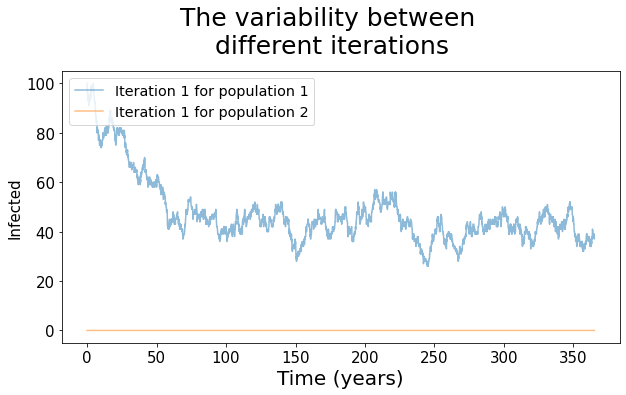

In [569]:
beta=1.0
gamma=1/7.0
mu=1/70
N0=500
rhoij = 0.000
# delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)
rho = [[1,1],[1,1]]
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=365.0
Y01=100
X01=pl.floor(gamma*N0/beta)
print(X01)
# Y0=5
# X0=8000
Z01=N0-X01-Y01
Y02=0
X02=pl.floor(gamma*N0/beta)
Z02=N0-X02-Y02

nsub = 2

INPUT = [[X01,Y01,Z01],[X02,Y02,Z02]]

timestep=0.0

fig, (ax2) = plt.subplots(1, sharex=True, figsize = (10,5))

for i in range(1):
    [T,S,I,R]=Stoch_Iteration(INPUT)
    
    tT=T
    tS=S
    tI=I
    tR=R

    alfa = 1
    for sub in range(nsub):
        ax2.plot(tT[1:], tI[sub][1:], alpha=0.5, label=('Iteration {} for population {}'.format(i+1, sub+1)))
ax2.set_ylabel("Infected", size = 15)

    
plt.legend(loc = "upper left", fontsize = "x-large")
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
fig.suptitle('The variability between \n different iterations ', size = 25, y = 1.06)
plt.xlabel ('Time (years)', size = 20)
plt.show()